## Gerekli Kütüphanelerin İmportlanması

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import idx2numpy
from scipy import optimize
import gzip
import PIL

## Verinin İmport Edilmesi

In [2]:
data = os.getcwd() + "\\Data"
test_images = idx2numpy.convert_from_string(gzip.open(data + "\\t10k-images-idx3-ubyte.gz").read())
test_labels = idx2numpy.convert_from_string(gzip.open(data + "\\t10k-labels-idx1-ubyte.gz").read())
train_images= idx2numpy.convert_from_string(gzip.open(data + "\\train-images-idx3-ubyte.gz").read())
train_labels= idx2numpy.convert_from_string(gzip.open(data + "\\train-labels-idx1-ubyte.gz").read())

## Veriden Bir Örnek

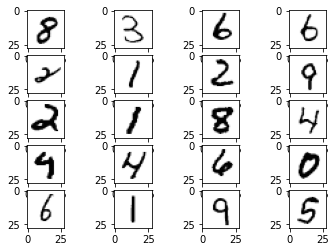

[[8 3 6 6]
 [2 1 2 9]
 [2 1 8 4]
 [9 4 6 0]
 [6 1 9 5]]


In [3]:
rands = np.random.randint(0,6000,20)
for i in range(len(rands)):
    plt.subplot(5,4,i+1)
    plt.imshow(train_images[rands[i]],cmap = "Greys") 
plt.show()
print(train_labels[rands].reshape(5,4))

## Gerekli Fonksiyonların Hazırlanması

In [11]:
def g(z):
    return 1/(1+np.exp(-z))
def sigmoid_gradient(z):
    return g(z) * (1-g(z))

## Verinin Normalize Edilmesi

In [5]:
X= train_images
X = X.reshape(60000,28*28) 
X = (X/255 -0.5) * 2

## Etiketlerin Vektörden Matrise Çevrilmesi

In [6]:
Y = []
eye =  np.eye(10)
for i in train_labels:
    Y.append(eye[i])
Y = np.array(Y)

## Rastgele Başlangıç Ağırlıklarının Tanımlanması

In [4]:
def randweight(shape,epsilon):
    return (np.random.rand(shape[0]*shape[1])*2*epsilon - epsilon).reshape(shape)

In [5]:
hidden_layer_size = 128

In [9]:
Theta_1_Shape = (hidden_layer_size,785)
Theta_2_Shape = (10,hidden_layer_size+1)
Theta_1 = randweight(Theta_1_Shape,1/np.power(10,4))
Theta_2 = randweight(Theta_2_Shape,1/np.power(10,4))
Parameters = np.concatenate([Theta_1.ravel(),Theta_2.ravel()])
mincost = {}
it = 1

## Hata Payı ve Backpropogation Fonksiyonu

In [12]:
def J(params,X,Y,lambda_,hidden_layer_size):
    ## FEEDFORWARD AND COST
    global it
    t1 = params[0:785*hidden_layer_size].reshape(hidden_layer_size,785)
    t2 = params[785*hidden_layer_size::].reshape(10,hidden_layer_size+1)
    j = 0
    a1 = np.insert(X,0,1,axis = 1)
    z2 = a1@t1.T
    a2 = np.insert(g(z2),0,1,axis = 1) 
    z3 = a2@t2.T
    a3 = g(z3)
    m = len(X)
    for i in range(m):
        for k in range(10):
            j+= -Y[i][k] * np.log(a3[i][k]) - (1-Y[i][k])*np.log(1-a3[i][k])
    reg = lambda_/(2*m)*(np.sum(t1[::,1:]**2) +np.sum(t2[::,1:]**2))
    ## BACKPROPOGATION AND GRADIENT
    d3 = a3 - Y
    d2 = (t2[::,1:].T@d3.T).T*sigmoid_gradient(z2)
    D1 = d2.T@a1
    D2 = d3.T@a2
    Q1 = t1.copy()
    Q2 = t2.copy()
    grad = np.concatenate([D1.ravel(), D2.ravel()])/m
    Q1[0,:] = 0
    Q2[0,:] = 0
    gradreg =  np.concatenate([(Q1*lambda_/m).ravel(),(Q2*lambda_/m).ravel()])
    
    print(it,"COST:", j/m+reg)
    it = it +1
    return j/m + reg,grad + gradreg

## Parametrelerin Optimize Edilmesi 

In [13]:
hidden_layer_size = 128
lambda_ = 1
cost = lambda p: J(p,X,Y,lambda_,hidden_layer_size)
Theta_1_Shape = (hidden_layer_size,785)
Theta_2_Shape = (10,hidden_layer_size+1)
Theta_1 = randweight(Theta_1_Shape,0.12)
Theta_2 = randweight(Theta_2_Shape,0.12)
Parameters = np.concatenate([Theta_1.ravel(),Theta_2.ravel()])
res = optimize.minimize(cost,
                    Parameters,
                    jac=True,
                    method='TNC')
params = res.x

1 COST: 6.548170487404952
2 COST: 6.5481691809585065
3 COST: 6.548170339829736
4 COST: 3.351943570605137
5 COST: 3.3519435528515515
6 COST: 3.351943556949404
7 COST: 3.351943559858075
8 COST: 3.3519434502399656
9 COST: 2.9749596301408316
10 COST: 2.9749595456829936
11 COST: 2.9749595342449275
12 COST: 2.9749565539940983
13 COST: 8.218887118825506
14 COST: 3.807104426893472
15 COST: 2.5462842603270714
16 COST: 2.5232939795889444
17 COST: 2.4680520732311617
18 COST: 2.4680518295428433
19 COST: 2.4680519325603627
20 COST: 2.4680518766765034
21 COST: 2.4680473029253425
22 COST: 4.081231814276226
23 COST: 2.2141216207195478
24 COST: 1.9834854580149852
25 COST: 1.9834852403523673
26 COST: 1.9834853499287306
27 COST: 1.9834853602154146
28 COST: 1.9834853674645108
29 COST: 1.9834851986153148
30 COST: 1.3773607045249359
31 COST: 1.3773605020336745
32 COST: 1.377360613044299
33 COST: 1.3773606471101731
34 COST: 1.377360427668914
35 COST: 1.2793297080447135
36 COST: 1.2005437462270743
37 COST: 1.

C:\Users\egeca\AppData\Local\Temp\ipykernel_19216\2983346883.py:15: RuntimeWarning: divide by zero encountered in log
  j+= -Y[i][k] * np.log(a3[i][k]) - (1-Y[i][k])*np.log(1-a3[i][k])
C:\Users\egeca\AppData\Local\Temp\ipykernel_19216\2983346883.py:15: RuntimeWarning: invalid value encountered in double_scalars
  j+= -Y[i][k] * np.log(a3[i][k]) - (1-Y[i][k])*np.log(1-a3[i][k])


1459 COST: nan
1460 COST: nan
1461 COST: nan
1462 COST: nan
1463 COST: nan
1464 COST: nan
1465 COST: nan
1466 COST: nan
1467 COST: nan
1468 COST: nan
1469 COST: nan
1470 COST: nan
1471 COST: nan
1472 COST: nan
1473 COST: nan
1474 COST: nan
1475 COST: nan
1476 COST: nan
1477 COST: nan
1478 COST: nan
1479 COST: nan
1480 COST: nan
1481 COST: nan
1482 COST: nan
1483 COST: nan
1484 COST: nan
1485 COST: nan
1486 COST: nan
1487 COST: nan
1488 COST: nan
1489 COST: nan
1490 COST: nan
1491 COST: nan
1492 COST: nan
1493 COST: nan
1494 COST: nan
1495 COST: nan
1496 COST: nan
1497 COST: nan
1498 COST: nan
1499 COST: nan
1500 COST: nan
1501 COST: nan
1502 COST: nan
1503 COST: nan
1504 COST: nan
1505 COST: nan
1506 COST: nan
1507 COST: nan
1508 COST: nan
1509 COST: nan
1510 COST: nan
1511 COST: nan
1512 COST: nan
1513 COST: nan
1514 COST: nan
1515 COST: nan
1516 COST: nan
1517 COST: nan
1518 COST: nan
1519 COST: nan
1520 COST: nan
1521 COST: nan
1522 COST: nan
1523 COST: nan
1524 COST: nan
1525 COST:

## Eğitim Verisine Uyum

In [7]:
params = np.load("Parameters.npy")

In [8]:
t1 = params[0:785*128].reshape(128,785)
t2 = params[785*128:].reshape(10,129)
X=train_images.reshape(60000,28*28)
X = (X/255 -0.5) * 2

In [12]:
a1 = np.insert(X,0,1,axis = 1)
z2 = a1@t1.T
a2 = np.insert(g(z2),0,1,axis = 1) 
z3 = a2@t2.T
a3 = g(z3)

In [13]:
h = np.argmax(a3,axis =1)

In [14]:
print("Accuracy:",sum(h==train_labels)/len(X)*100)

Accuracy: 100.0


## Test Verisine Uyum

In [15]:
X = (test_images / 255 - 0.5)*2

In [16]:
a1 = np.insert(X.reshape(10000,28*28),0,1,axis = 1)
z2 = a1@t1.T
a2 = np.insert(g(z2),0,1,axis = 1) 
z3 = a2@t2.T
a3 = g(z3)

In [17]:
h = np.argmax(a3,axis = 1)
print("Accuracy:",sum(h == test_labels) / len(test_labels) *100)

Accuracy: 97.68
